In [24]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#load dataset & split it into train & test samples

In [5]:
from keras.datasets import cifar10
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [7]:
X_train.shape # 50,000 images each image is 32 by 32 pixels & 3 is for RGB

(50000, 32, 32, 3)

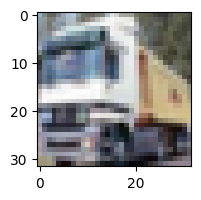

In [13]:
#control the size of image
plt.figure(figsize = (15, 2))
plt.imshow(X_train[1])

In [14]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [18]:
def plot_sample(X, y, i):
  plt.figure(figsize = (15, 2))
  plt.imshow(X[i])
  plt.xlabel(classes[y[i]])

In [16]:
#reshape y in 1d array

y_train = y_train.reshape(-1, )

In [17]:
y_train

array([6, 9, 9, ..., 9, 1, 1], dtype=uint8)

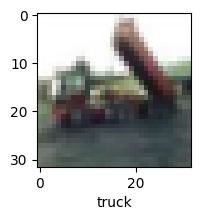

In [19]:
plot_sample(X_train, y_train, 2)

In [20]:
#scaling
X_train = X_train/255
X_test = X_test/255

In [29]:
cnn = models.Sequential([
        #cnn layers

        #layer1
        layers.Conv2D(filters = 32, activation = 'relu', kernel_size = (3,3), input_shape = (32, 32, 3)), #input layer(CNN)
        layers.MaxPooling2D((2, 2)), #pooling

        #layer2
        layers.Conv2D(filters = 64, activation = 'relu', kernel_size = (3,3)), #input layer(CNN)
        layers.MaxPooling2D((2, 2)), #pooling


        #dense
        layers.Flatten(),
        layers.Dense(64, activation='relu'),
        layers.Dense(10, activation='softmax')    #multiclass classification
    ])

In [30]:
cnn.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [31]:
cnn.fit(X_train, y_train, epochs = 10)

Epoch 1/10
1563/1563 [==============================] - 8s 4ms/step - loss: 1.4494 - accuracy: 0.4838
Epoch 2/10
1563/1563 [==============================] - 7s 4ms/step - loss: 1.0953 - accuracy: 0.6183
Epoch 3/10
1563/1563 [==============================] - 7s 4ms/step - loss: 0.9714 - accuracy: 0.6633
Epoch 4/10
1563/1563 [==============================] - 7s 4ms/step - loss: 0.8871 - accuracy: 0.6925
Epoch 5/10
1563/1563 [==============================] - 7s 4ms/step - loss: 0.8189 - accuracy: 0.7142
Epoch 6/10
1563/1563 [==============================] - 7s 4ms/step - loss: 0.7704 - accuracy: 0.7348
Epoch 7/10
1563/1563 [==============================] - 7s 4ms/step - loss: 0.7193 - accuracy: 0.7510
Epoch 8/10
1563/1563 [==============================] - 7s 4ms/step - loss: 0.6740 - accuracy: 0.7650
Epoch 9/10
1563/1563 [==============================] - 7s 4ms/step - loss: 0.6367 - accuracy: 0.7765
Epoch 10/10
1563/1563 [==============================] - 7s 4ms/step - loss: 0.597

In [32]:
cnn.evaluate(X_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.9617 - accuracy: 0.6868


[0.9617459774017334, 0.6868000030517578]

In [33]:
y_test = y_test.reshape(-1, )

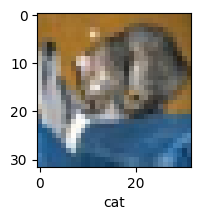

In [42]:
plot_sample(X_test, y_test, 0)

In [40]:
#making prediction
y_pred = cnn.predict(X_test)
print(np.argmax(y_pred[0]))

313/313 [==============================] - 1s 3ms/step
3


In [44]:
y_classes = [np.argmax(ele) for ele in y_pred]

In [45]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

In [46]:
y_classes[:5]

[3, 8, 8, 0, 6]